In [1]:
import pandas as pd

ae_name = 'dizziness'

df = pd.read_csv(f'data_normalized_{ae_name}.csv')
df

,drug,SMILES,appendix endocrine cells,urinary bladder urothelial cells,colon mucosal lymphoid cells,skeletal muscle myocytes,nasopharynx ciliated cells (ciliary rootlets),skin 2 extracellular matrix,kidney cells in tubules,soft tissue 2 peripheral nerve,...,breast myoepithelial cells,cerebellum synaptic glomeruli - capsule,liver cholangiocytes,bronchus goblet cells,cerebellum processes in white matter,endometrium nonciliated luminal epithelial cells,skin 1 arrector pili muscle cells,endometrium macrophages,appendix germinal center cells,dizziness
0,alfentanil,CCC(=O)N(C1=CC=CC=C1)C2(CCN(CC2)CCN3C(=O)N(N=N...,-1.304351,-1.375542,-1.443361,-1.301450,-0.740173,-1.829987,-1.301946,-1.117008,...,-1.340314,-2.018035,-1.391034,-1.844057,-1.523853,-0.581029,-1.389189,-0.886827,-1.258598,1
1,telithromycin,CC[C@@H]1[C@@]2([C@@H]([C@H](C(=O)[C@@H](C[C@@...,-1.663664,-1.731440,-1.554609,-1.783875,-1.114384,-1.321797,-1.724248,-1.642483,...,-1.752763,-1.087099,-1.794477,-2.151840,-1.115659,-0.665196,-2.072791,-0.350386,-1.635042,1
2,pentamidine.isethionate,C1=CC(=CC=C1C(=N)N)OCCCCCOC2=CC=C(C=C2)C(=N)N,0.244844,0.409398,0.496597,0.381352,0.180935,0.323109,0.427928,0.356272,...,0.414884,0.120989,0.393108,0.218014,0.119931,0.160578,-0.090038,0.338903,0.346735,1
3,lamivudine,C1[C@H](O[C@H](S1)CO)N2C=CC(=NC2=O)N,1.049973,0.852049,0.778864,0.889209,1.159721,0.132526,0.916193,0.930708,...,0.862569,0.695510,0.833929,0.745644,1.306276,0.688898,1.273272,0.479819,0.762787,1
4,retigabine,CCOC(=O)NC1=C(C=C(C=C1)NCC2=CC=C(C=C2)F)N,0.139774,0.492155,0.261914,0.528918,0.096952,0.718164,0.551120,0.642344,...,0.595792,0.623591,0.447754,0.419062,0.634975,0.775970,-0.037979,0.040479,0.324006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,morphine,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,0.535588,0.506711,0.449502,0.514845,0.819062,-0.112120,0.489169,0.457299,...,0.452481,0.567804,0.513020,0.414430,0.211166,0.047384,0.058933,-0.031116,0.545457,1
486,clofarabine,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,2.248751,2.067395,1.893965,2.103322,3.462149,1.870588,2.180384,2.135745,...,2.084035,2.057966,2.111154,1.586496,3.188976,1.277663,2.207860,0.769457,1.821616,1
487,rufinamide,C1=CC(=C(C(=C1)F)CN2C=C(N=N2)C(=O)N)F,0.305892,0.241576,0.199011,0.196160,-0.379092,-0.003164,0.215129,0.286831,...,0.258825,0.361441,0.226601,0.079363,0.296542,-0.041783,0.357092,-0.038001,0.327217,1
488,cabazitaxel,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...,-2.444512,-2.305256,-2.250296,-2.252377,-1.387748,-1.228835,-2.268095,-2.252082,...,-2.299520,-2.399920,-2.322255,-2.227677,-2.286980,-1.800448,-2.160687,-1.807827,-2.109181,0


In [2]:
from utils import *

In [3]:
# df = process(df)
df = df.drop(columns=['drug', 'SMILES'])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(df, df[ae_name]):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]
test_df

,appendix endocrine cells,urinary bladder urothelial cells,colon mucosal lymphoid cells,skeletal muscle myocytes,nasopharynx ciliated cells (ciliary rootlets),skin 2 extracellular matrix,kidney cells in tubules,soft tissue 2 peripheral nerve,skin 2 fibrohistiocytic cells,caudate neuronal cells,...,breast myoepithelial cells,cerebellum synaptic glomeruli - capsule,liver cholangiocytes,bronchus goblet cells,cerebellum processes in white matter,endometrium nonciliated luminal epithelial cells,skin 1 arrector pili muscle cells,endometrium macrophages,appendix germinal center cells,dizziness
219,-0.336380,0.217886,0.072404,0.265159,-0.235028,-0.149876,0.248460,0.255838,-0.022937,0.257251,...,0.270386,0.094565,0.101370,0.207398,-0.142946,0.163443,-0.635525,-0.181610,0.155377,1
72,-0.866508,-0.811526,-0.890938,-0.801053,-0.848781,-1.025738,-0.811413,-0.805815,-0.895719,-0.793879,...,-0.808183,-0.579405,-0.840838,-0.647079,-0.700829,-0.827737,-0.723106,-0.848622,-0.917952,1
445,0.336629,0.277269,0.376100,0.218085,0.330534,-0.073303,0.247810,0.240273,0.284997,0.205567,...,0.221693,0.141573,0.224267,0.066462,0.339329,0.771861,0.155554,0.790161,0.262224,1
446,1.468614,1.813497,1.386382,1.946994,1.832079,1.273484,1.910613,1.944522,1.334575,1.911456,...,1.885320,1.092425,1.736157,1.683028,1.756150,0.756130,1.111289,0.784774,1.251527,1
247,0.913166,0.505195,0.611895,0.432182,-0.159486,0.571948,0.439653,0.493705,0.713349,0.554929,...,0.491623,1.708143,0.581168,1.061401,1.255272,0.210590,0.997921,0.499839,0.714108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1.000054,0.700312,1.028780,0.675916,1.061017,1.156402,0.739446,0.668529,1.076383,0.742246,...,0.702915,0.409664,0.790851,0.402822,0.404915,0.853907,0.917582,0.759910,0.999715,1
254,-0.235834,-0.339110,-0.063248,-0.468336,-0.235772,-0.028387,-0.368046,-0.474927,0.066257,-0.513756,...,-0.428250,-0.581777,-0.357456,-0.204292,-0.459568,2.052278,-0.098056,1.229595,-0.295862,1
152,0.437367,0.341705,0.410310,0.310118,-0.172583,0.012233,0.360129,0.324913,0.493405,0.376290,...,0.368508,0.131381,0.365661,0.563092,0.444237,0.577152,0.725284,0.987408,0.085554,1
346,0.144014,0.459512,0.288255,0.494266,0.248399,0.753051,0.429116,0.548409,0.411183,0.503645,...,0.480632,0.854821,0.430136,0.810678,0.541224,0.411920,-0.234291,0.175337,0.524605,1


In [5]:
# train_df = train_df.reset_index(drop=True)

# for train_index, val_index in split.split(train_df, train_df[ae_name]):
#     val_df = train_df.loc[val_index]
#     train_df = train_df.loc[train_index]
# val_df

In [6]:
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import pickle
import numpy as np

class Classifier(nn.Module):
    def __init__(self, in_dim, h_dims:list):
        super(Classifier, self).__init__()

        neurons = [in_dim, *h_dims]
        linear_layers = [nn.Linear(neurons[i-1], neurons[i]) \
                         for i in range(1, len(neurons))]
        self.hidden = nn.ModuleList(linear_layers)
        # self.emb = nn.GRU(h_dims[-1], h_dims[-1])
        self.final = nn.Linear(h_dims[-1], 1)
        self.output = nn.Sigmoid()

    def forward(self, x):
        for layer in self.hidden:
            x = F.relu(layer(x))
        # x = torch.squeeze(self.output(self.final(x)))
        x = torch.squeeze(self.output(self.final(x)))
        return x

class tox_dataset(Dataset):
    def __init__(self, df):
        self.len = len(df)
        self.df = df
        self.ic_start_ind = df.columns.get_loc("appendix endocrine cells")
        self.ae_start_ind = df.columns.get_loc(ae_name)

    def __getitem__(self, idx):
        """
        OUTPUT
        :param fp: fingerprint, should be 167 dim
        :param ic: drug tissue concentration
        :param ae: adverse events
        """
        # header = ['bit' + str(i) for i in range(167)]
        # fp = self.df[header]
        # fp = torch.tensor([float(b) for b in fp.iloc[idx]], dtype=torch.float32)
        ic = self.df.iloc[:, self.ic_start_ind:self.ae_start_ind]
        ic = torch.tensor(ic.values.astype(np.float32))[idx]
        ae = self.df.iloc[:, self.ae_start_ind:]
        ae = torch.tensor(ae.values.astype(np.float32))[idx]
        # ae = onehot(5)(ae) # use onehot 
        # return fp, ic, ae.float()
        return ic, ae.float()
    def __len__(self): return self.len


In [7]:
# dataset test, select first row
# fp, ic, ae = tox_dataset(train_df)[0]
# fp, ic, ae
ic, ae = tox_dataset(train_df)[0]
ic, ae

(tensor([-0.8249, -0.5512, -0.6954, -0.5252, -0.1373, -0.3081, -0.5608, -0.5867,
         -0.8059, -0.5568, -0.7046, -0.6261, -0.4160, -0.3081, -1.0486, -1.0769,
         -0.8007, -0.6222, -0.7478, -0.8580, -0.5945, -1.2878, -0.6668, -0.5145,
         -0.7120, -0.3841, -0.3966, -0.5595, -0.5927, -0.5962, -0.4952, -1.2513,
         -0.5171, -0.8675, -0.5130, -0.5752, -0.2740, -0.5372, -0.3819, -1.0000,
         -0.5426, -0.5569, -0.4327, -0.4673, -0.5605, -0.7003, -0.5563, -0.4780,
         -0.5789, -0.6502, -0.5471, -0.6491, -0.5844, -0.2444, -0.9254, -0.5287,
         -1.0031, -0.6190, -0.5635, -1.1148, -0.4007, -1.4850, -0.5944, -0.8463,
         -1.4850, -0.6437, -0.6597,  0.4522, -0.6260, -0.9120, -0.5359, -0.5747,
         -0.5455, -0.9240, -0.5681, -0.0520, -0.0213, -0.1723, -0.5960, -1.0253,
         -0.6269, -0.6130, -0.9307, -0.5232, -0.7036, -0.6083, -0.5934, -0.5900,
         -0.3454, -0.5580, -0.2789, -0.9303, -0.8337, -0.6258, -0.9229, -1.0082,
         -0.5471, -1.1871, -

In [8]:
# batch_size is changeable
params = {'batch_size':64, 'shuffle':True,
          'drop_last':False, 'num_workers': 0}

# train_loader = DataLoader(tox_dataset(train_df), **params)
# val_loader = DataLoader(tox_dataset(val_df), **params)
# test_loader = DataLoader(tox_dataset(test_df), **params)

In [9]:
import torch.optim as optim
from dgllife.utils import EarlyStopping

# hidden dims of neural network are changeable,
# as long as its all integers
h_dims = [1000, 256*2, 256, 128]
dropout = 0.1

lr = 1e-5 # learning rate, try 1e-5
wd = 1e-5 # weight decay try 1e-5
best_epoch = 0
MAX_EPOCH = 300
model_path = 'test.pt'
patience = 30
stopper = EarlyStopping(mode='lower', patience=patience)
verbose_freq = 10 # print out results every 10 epochs
##############################################

# BELOW IS NOT CHANGEABLE
in_dim = ic.shape[0]

# num_tasks = ae.shape[0] # the number of tasks
# task_classes = 6 # the label should be in [0, 1, 2, 3, 4, 5]
# task_list = [task_classes] * num_tasks

# model = Classifier(in_dim, h_dims)
# if torch.cuda.is_available(): model = model.cuda()

# optimizer = optim.AdamW(params=model.parameters(), lr=lr, weight_decay=wd)


Fold 1
-------
Epoch:0 [Train] Loss:4617.927 |  [Valid] Loss: 2840.817	SAVE MODEL: loss drop: inf -> 2840.817
Epoch:1 [Train] Loss:4615.704 |  [Valid] Loss: 2563.948	SAVE MODEL: loss drop: 2840.817 -> 2563.948
Epoch:2 [Train] Loss:4612.266 |  [Valid] Loss: 2931.038	EarlyStopping counter: 1 out of 30
Epoch:3 [Train] Loss:4464.472 |  [Valid] Loss: 2838.839	EarlyStopping counter: 2 out of 30
Epoch:4 [Train] Loss:4499.299 |  [Valid] Loss: 2747.559	EarlyStopping counter: 3 out of 30
Epoch:5 [Train] Loss:4640.225 |  [Valid] Loss: 2927.460	EarlyStopping counter: 4 out of 30
Epoch:6 [Train] Loss:4496.002 |  [Valid] Loss: 2837.396	EarlyStopping counter: 5 out of 30
Epoch:7 [Train] Loss:4600.972 |  [Valid] Loss: 2747.977	EarlyStopping counter: 6 out of 30
Epoch:8 [Train] Loss:4561.224 |  [Valid] Loss: 2836.614	EarlyStopping counter: 7 out of 30
Epoch:9 [Train] Loss:4456.083 |  [Valid] Loss: 2835.945	EarlyStopping counter: 8 out of 30
Epoch:10 [Train] Loss:4593.979 |  [Valid] Loss: 2572.792	Early

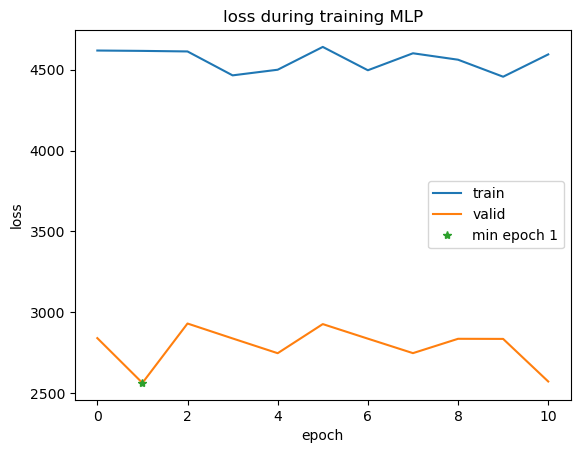

*************** dizziness ***************
TN: 11; FP: 0; FN: 73; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.131  &0.500  &  nan  &0.000  &1.000  &  nan &0.427 &  nan &0.848

Epoch:11 [Train] Loss:4628.484 |  [Valid] Loss: 2662.792	EarlyStopping counter: 10 out of 30
Epoch:12 [Train] Loss:4556.853 |  [Valid] Loss: 2748.980	EarlyStopping counter: 11 out of 30
Epoch:13 [Train] Loss:4518.007 |  [Valid] Loss: 2749.269	EarlyStopping counter: 12 out of 30
Epoch:14 [Train] Loss:4587.313 |  [Valid] Loss: 2662.891	EarlyStopping counter: 13 out of 30
Epoch:15 [Train] Loss:4618.948 |  [Valid] Loss: 2835.763	EarlyStopping counter: 14 out of 30
Epoch:16 [Train] Loss:4585.967 |  [Valid] Loss: 2834.714	EarlyStopping counter: 15 out of 30
Epoch:17 [Train] Loss:4581.818 |  [Valid] Loss: 2666.612	EarlyStopping counter: 16 out of 30
Epoch:18 [Train] Loss:4483.656 |  [Valid] Loss: 2835.008	EarlyStopping counter: 17 out of 30
Epoch:19 [Train] Loss:4544.979 |  [Valid] Loss: 29

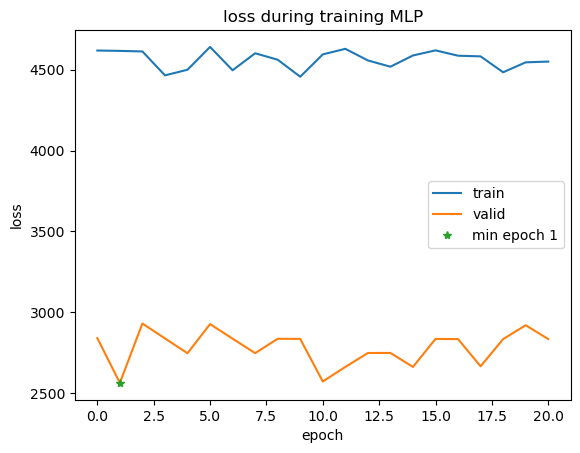

*************** dizziness ***************
TN: 11; FP: 0; FN: 73; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.131  &0.500  &  nan  &0.000  &1.000  &  nan &0.445 &  nan &0.854

Epoch:21 [Train] Loss:4478.852 |  [Valid] Loss: 2753.227	EarlyStopping counter: 20 out of 30
Epoch:22 [Train] Loss:4547.053 |  [Valid] Loss: 2918.306	EarlyStopping counter: 21 out of 30
Epoch:23 [Train] Loss:4577.252 |  [Valid] Loss: 2674.147	EarlyStopping counter: 22 out of 30
Epoch:24 [Train] Loss:4542.801 |  [Valid] Loss: 2835.888	EarlyStopping counter: 23 out of 30
Epoch:25 [Train] Loss:4510.863 |  [Valid] Loss: 2996.967	EarlyStopping counter: 24 out of 30
Epoch:26 [Train] Loss:4576.148 |  [Valid] Loss: 2916.855	EarlyStopping counter: 25 out of 30
Epoch:27 [Train] Loss:4606.076 |  [Valid] Loss: 2755.972	EarlyStopping counter: 26 out of 30
Epoch:28 [Train] Loss:4608.629 |  [Valid] Loss: 2755.800	EarlyStopping counter: 27 out of 30
Epoch:29 [Train] Loss:4572.567 |  [Valid] Loss: 29

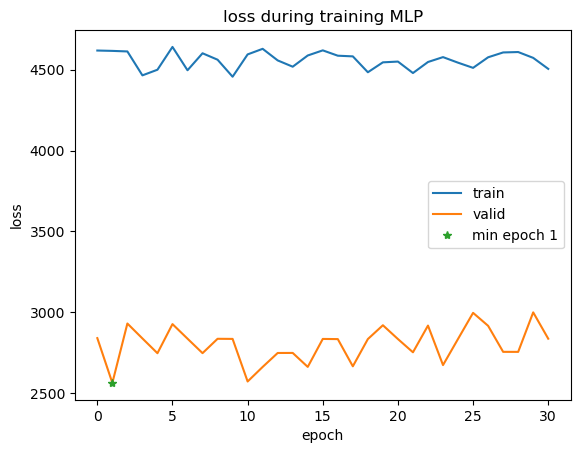

*************** dizziness ***************
TN: 11; FP: 0; FN: 73; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.131  &0.500  &  nan  &0.000  &1.000  &  nan &0.441 &  nan &0.852

Epoch:31 [Train] Loss:4449.800 |  [Valid] Loss: 2918.653	EarlyStopping counter: 30 out of 30
early stop
Finished training 



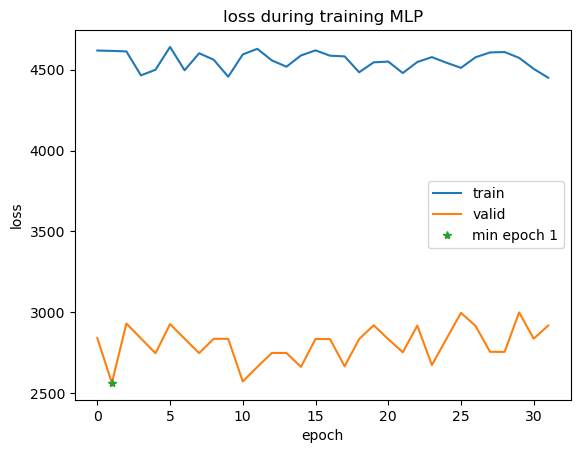

load model from path:  test.pt
***************  ***************
TN: 0; FP: 11; FN: 15; TP: 48
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.649  &0.381  &0.814  &0.762  &0.000  &0.787 &0.271 &-0.211 &0.796


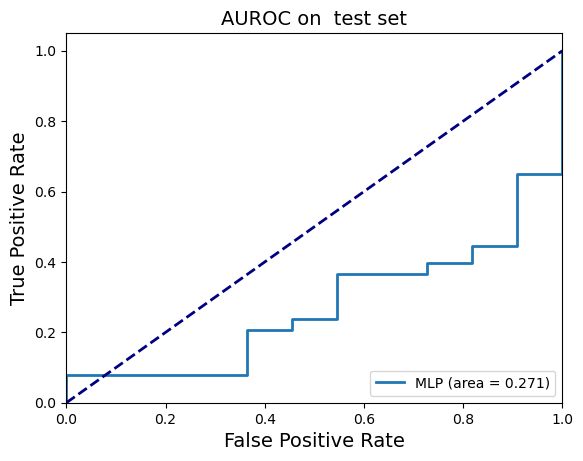

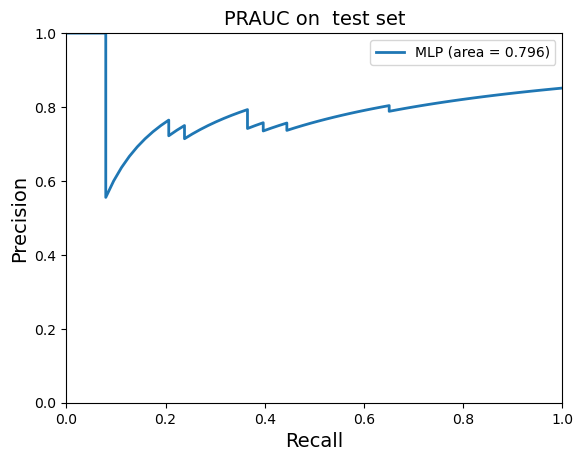


TN: 0; FP: 11; FN: 15; TP: 48
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.649  &0.381  &0.814  &0.762  &0.000  &0.787 &0.271 &-0.211 &0.796
Fold 2
-------
Epoch:0 [Train] Loss:4840.542 |  [Valid] Loss: 3303.927	EarlyStopping counter: 31 out of 30
SAVE MODEL: loss drop: inf -> 3303.927
early stop
Finished training 



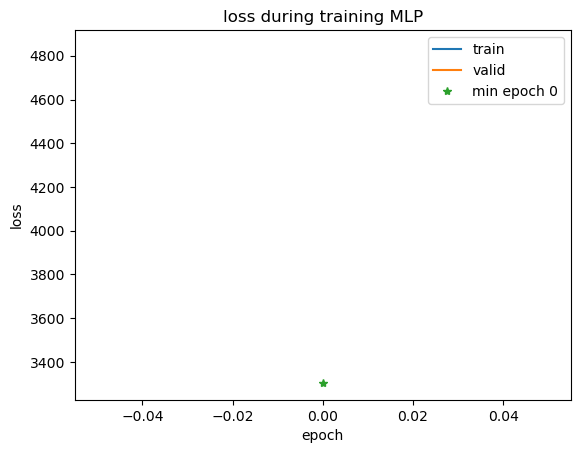

load model from path:  test.pt
***************  ***************
TN: 11; FP: 0; FN: 63; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.149  &0.500  &  nan  &0.000  &1.000  &  nan &0.222 &  nan &0.739


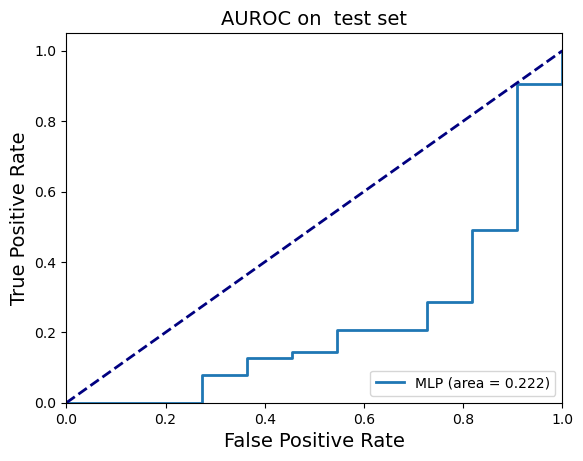

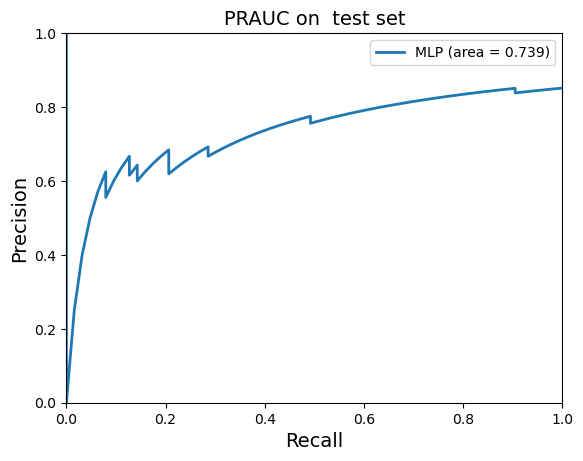


TN: 11; FP: 0; FN: 63; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.149  &0.500  &  nan  &0.000  &1.000  &  nan &0.222 &  nan &0.739
Fold 3
-------
Epoch:0 [Train] Loss:4697.287 |  [Valid] Loss: 3216.353	EarlyStopping counter: 32 out of 30
SAVE MODEL: loss drop: inf -> 3216.353
early stop
Finished training 



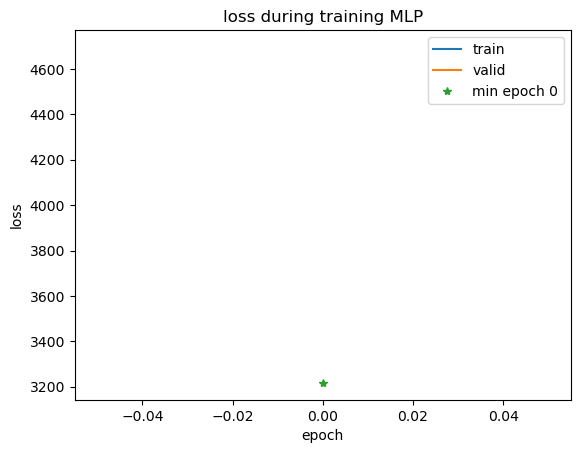

load model from path:  test.pt
***************  ***************
TN: 1; FP: 10; FN: 31; TP: 32
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.446  &0.299  &0.762  &0.508  &0.091  &0.610 &0.270 &-0.288 &0.768


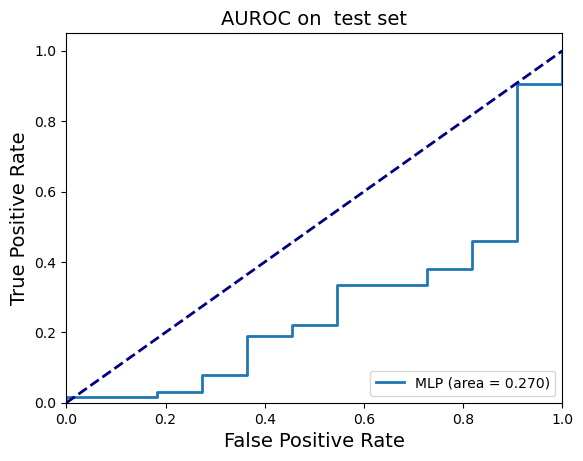

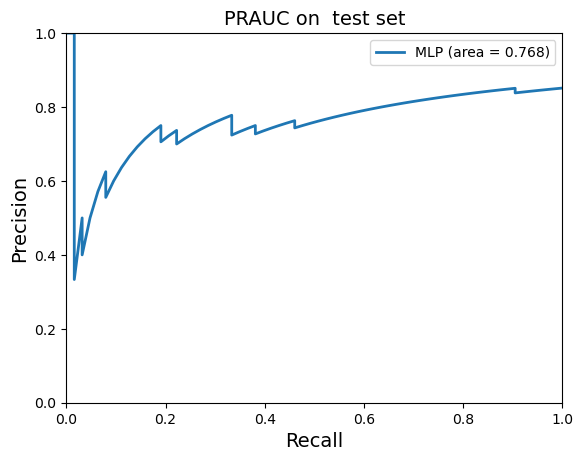


TN: 1; FP: 10; FN: 31; TP: 32
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.446  &0.299  &0.762  &0.508  &0.091  &0.610 &0.270 &-0.288 &0.768
Fold 4
-------
Epoch:0 [Train] Loss:4430.610 |  [Valid] Loss: 3271.107	EarlyStopping counter: 33 out of 30
SAVE MODEL: loss drop: inf -> 3271.107
early stop
Finished training 



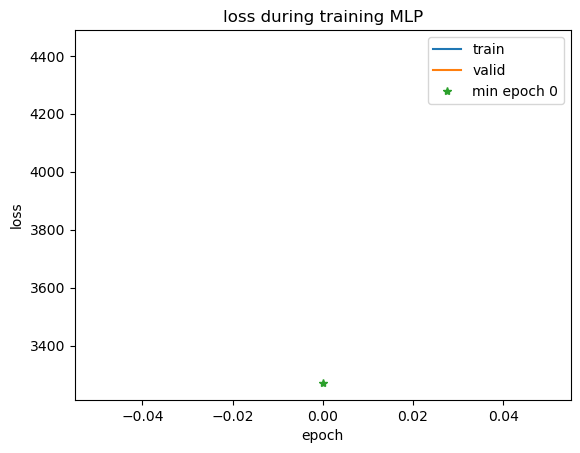

load model from path:  test.pt
***************  ***************
TN: 11; FP: 0; FN: 63; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.149  &0.500  &  nan  &0.000  &1.000  &  nan &0.342 &  nan &0.794


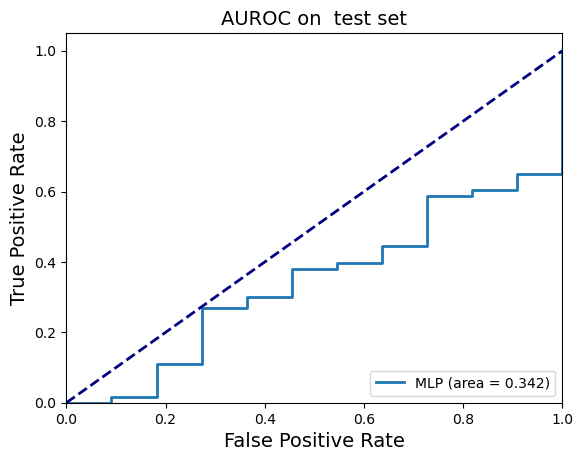

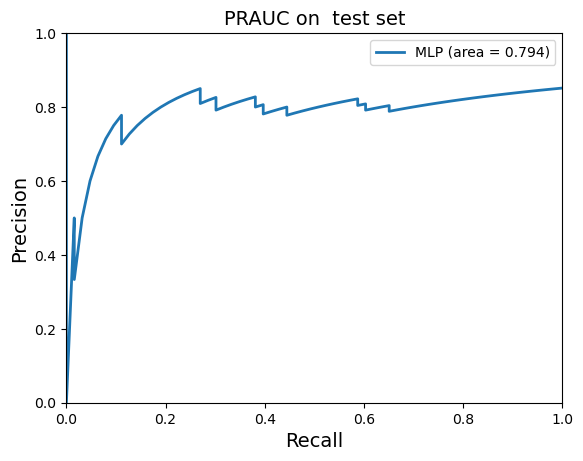


TN: 11; FP: 0; FN: 63; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.149  &0.500  &  nan  &0.000  &1.000  &  nan &0.342 &  nan &0.794
Fold 5
-------
Epoch:0 [Train] Loss:4249.428 |  [Valid] Loss: 2332.016	SAVE MODEL: loss drop: inf -> 2332.016
early stop
Finished training 



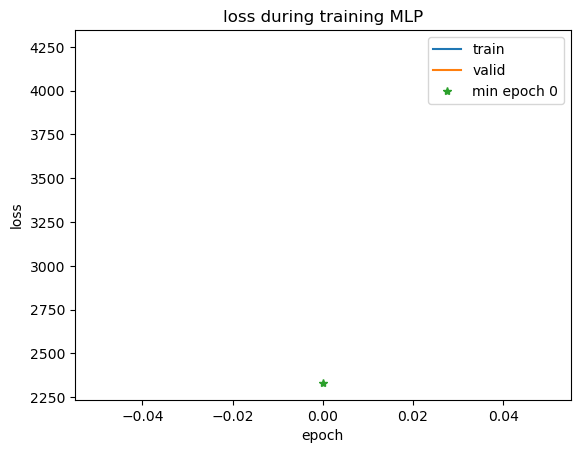

load model from path:  test.pt
***************  ***************
TN: 11; FP: 0; FN: 63; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.149  &0.500  &  nan  &0.000  &1.000  &  nan &0.711 &  nan &0.940


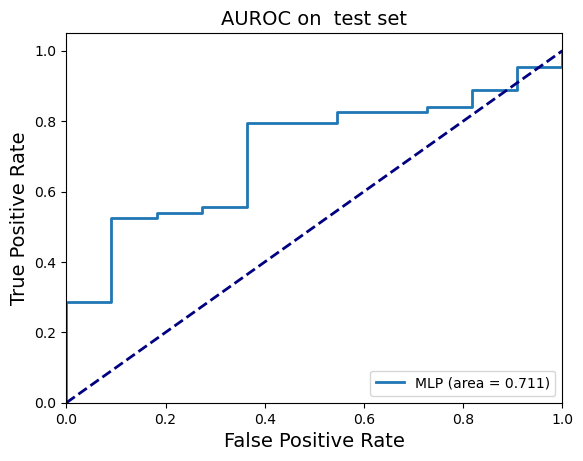

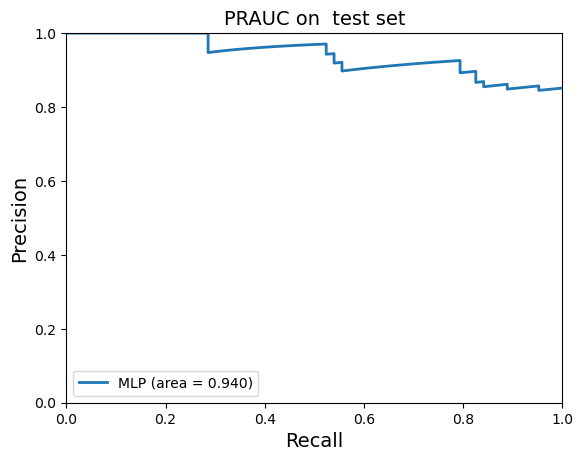


TN: 11; FP: 0; FN: 63; TP: 0
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.149  &0.500  &  nan  &0.000  &1.000  &  nan &0.711 &  nan &0.940


In [10]:
"modify weight_loss: list, the higher the num, more penalize if predict label 0 wrong"
from sklearn.model_selection import KFold
from ml_utils import *

k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True)

train_dataset = tox_dataset(train_df, ae_name)
test_loader = DataLoader(tox_dataset(test_df, ae_name), **params)

weight_losses = [7.0, 8.0, 8.0, 7.0, 6.0]

results = {
    "acc": [],
    "precision": [],
    "recall": [],
    "F1": [],
    "TP": [],
    "TN": [],
    "FP": [],
    "FN": []
}
for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold + 1}")
    print("-------")

    stopper = EarlyStopping(mode='lower', patience=patience)
    train_loader = DataLoader(
        train_dataset,
        batch_size=64,
        sampler=torch.utils.data.SubsetRandomSampler(train_idx),
    )
    val_loader = DataLoader(
        train_dataset,
        batch_size=64,
        sampler=torch.utils.data.SubsetRandomSampler(val_idx),
    )

    model = Classifier(in_dim, h_dims)
    if torch.cuda.is_available(): model = model.cuda()
    optimizer = optim.AdamW(params=model.parameters(), lr=lr, weight_decay=wd)

    train(model, train_loader, val_loader, weight_loss=weight_losses[fold], optimizer=optimizer, ae_name=ae_name)
    _, probs, label = eval(model, test_loader, model_path)
    preds = get_preds(0.5, probs)
    cls_results = evaluate(label, preds, probs)
    # [ACCURACY, weighted_accuracy, precision, SE, SP, F1, AUC, MCC, AP]
    for key in cls_results:
        results[key].append(cls_results[key])

for key in results:
    results[key].append(np.mean(results[key]))

results_df = pd.DataFrame.from_dict(results)
results_df.to_csv(f"{ae_name}_results.csv", index=False)
